In [95]:
import timeit
import math
import random
import matplotlib.pyplot as plt
import numpy as np

In [96]:
def getCrossProduct(p0,p1,p2):
    # Returns which is more counterclockwise
    cross_product = (p1[0] - p0[0]) * (p2[1]-p0[1]) - (p2[0]-p0[0]) * (p1[1]-p0[1])

    if cross_product == 0:
        return 0 #p1
    elif cross_product > 0:
        return 1 #p2
    else:
        return -1 #p1

In [97]:
def findFurthestOld(origin, points):

    maxDist = 0
    maxPoint = None
    for point in points:
        dist = ((origin[0]-point[0])**2 + (origin[1]-point[1])**2)
        if dist > maxDist:
            maxPoint = point
            maxDist = dist
    return maxPoint


In [98]:
def findFurthest(origin, points):
    def distance(point):
        return math.sqrt((origin[0] - point[0]) ** 2 + (origin[1] - point[1]) ** 2)
    
    return max(points, key=distance, default=None)

In [99]:
def jarvismarch(inputSet):

        #ADD YOUR CODE HERE
        firstPoint = min(inputSet)
        curPoint = firstPoint
        outputSet = []

        nextPoint = None
        while nextPoint != firstPoint:
            nextPoint = firstPoint

            for cord in inputSet:
                if curPoint == nextPoint:
                    nextPoint = cord
                    continue

                if getCrossProduct(curPoint,nextPoint,cord) > 0:
                    nextPoint = cord
                            
            outputSet.append(nextPoint)
            curPoint = nextPoint

        return outputSet

In [100]:
def grahamscan(inputSet):
    outputSet = []
    pointAngles = {}
    firstPoint = min(inputSet, key=lambda p: (p[1], p[0])) # Get the lowest and leftmost point

    # Grouping the points by polar angle
    for point in inputSet:
        if point == firstPoint:
            continue
        
        angle_rad = math.atan2(point[1] - firstPoint[1], point[0] - firstPoint[0] )

        if angle_rad in pointAngles:
            pointAngles[angle_rad].append(point)
        else:
            pointAngles[angle_rad] = [point]

    tempSet = [subArr[1][0] if len(subArr) == 1 else findFurthest(firstPoint, subArr[1]) for subArr in sorted(list(pointAngles.items()))] + [firstPoint]
    
    for point in tempSet:
        while len(outputSet) >= 2 and getCrossProduct(outputSet[-2], outputSet[-1], point) < 0:
            outputSet.pop()  # Remove the last point in the outputSet because it makes a non-left turn
        outputSet.append(point)

    return outputSet
        


    

In [101]:
def chen(inputSet):
    outputSet = []
    groupSize = 4
    
    for i in range(1, len(inputSet)):
        groupSize = 2 ** 2 ** i
        subPoints = [inputSet[i:i + groupSize] for i in range(0, len(inputSet), groupSize)]
        subHulls = [grahamscan(points) for points in subPoints]
        allSubHullPoints = [point for subHull in subHulls for point in subHull]

        outputSet = jarvismarch(allSubHullPoints)
        if len(outputSet) <= groupSize:
            return outputSet

    return outputSet



In [102]:
class TestDataGenerator():
    def __init__(self):
        self.xPoints = []
        self.yPoints = []
        self.points = []
        self.jarvisBorder = []
        self.grahamBorder = []
        self.chenBorder = []
        # self.inititaliseBorders()
        # self.displayHull()

    def generatePoints(self, size):
        self.xPoints, self.yPoints, self.points = [],[],[]
        while len(self.xPoints) < size :
            xp = random.randint(0,32767)
            yp = random.randint(0,32767)
            if (xp,yp) not in self.points:
                self.xPoints.append(xp)
                self.yPoints.append(yp)
                self.points.append((xp,yp))

    def generateColinear(self, size):
        self.xPoints, self.yPoints, self.points = [],[],[]
        for i in range(size):
            self.yPoints.append(0)
            self.xPoints.append(i)
            self.points.append((i,0))

    def generatePointsOnConvexHull(self, num_points, center=(0, 0), radius=2000):
         """ Generate points evenly spaced along the circumference of a circle.
           Parameters: num_points (int): Number of points to generate.
           center (tuple): Coordinates of the center of the circle.
            Default is (0, 0). 
            radius (float): Radius of the circle. 
            Default is 100. 
            Returns: list: List of (x, y) coordinates representing the points. """ 
         self.points = []
         for i in range(num_points):
             angle = 2 * math.pi * i / num_points 
             x = center[0] + radius * math.cos(angle) 
             y = center[1] + radius * math.sin(angle) 
             self.xPoints.append(x) 
             self.yPoints.append(y) 
             self.points.append((x, y))

    

    def runTest(self, size):
        self.generatePoints(size)
        self.inititaliseBorders()
        self.displayAllHull()
                
    def inititaliseBorders(self):
        self.initialiseJarvis()
        self.initialiseGraham()
        self.initialiseChen()

    def initialiseJarvis(self):
        start = timeit.default_timer()
        self.jarvisBorder = jarvismarch(self.points)
        end = timeit.default_timer()
        print("Jarvis execution time for case is ",(end-start))
    def initialiseGraham(self):
        self.grahamBorder = grahamscan(self.points)

    def initialiseChen(self):
        self.chenBorder = chen(self.points)

    def runJarvis(self):
        start = timeit.default_timer()
        self.jarvisBorder = jarvismarch(self.points)
        end = timeit.default_timer()
        return (end - start), len(self.jarvisBorder)

    def displayAllHull(self):
    
        # plt.figure(figsize=(3, 1))
        boundary = 4000

        # Create subplots with 1 row and 2 columns
        fig, axs = plt.subplots(1,3, figsize = (10,3))
        axs[0].scatter(self.xPoints, self.yPoints, color='red', s=5)
        axs[0].set_title("Jarvis")
        tempArr = self.jarvisBorder + [self.jarvisBorder[0]]
        x1, y1 = zip(*tempArr)
        axs[0].plot(x1, y1, '-', color = 'blue')
        axs[0].set_xlim(min(self.xPoints)-boundary, max(self.xPoints) + boundary)
        axs[0].set_ylim(min(self.yPoints)-boundary, max(self.yPoints) + boundary)

        axs[1].scatter(self.xPoints, self.yPoints, color='red', s=5)
        axs[1].set_title("Graham")
        tempArr = self.grahamBorder + [self.grahamBorder[0]]
        x2, y2 = zip(*tempArr)
        axs[1].plot(x2,y2, '-', color = 'blue')
        axs[1].set_xlim(min(self.xPoints)-boundary, max(self.xPoints) + boundary)
        axs[1].set_ylim(min(self.yPoints)-boundary, max(self.yPoints) + boundary)

        axs[2].scatter(self.xPoints, self.yPoints, color='red', s=5)
        axs[2].set_title("Chen")
        tempArr = self.chenBorder + [self.chenBorder[0]]
        x3, y3 = zip(*tempArr)
        axs[2].plot(x3,y3, '-', color = 'blue')
        axs[2].set_xlim(min(self.xPoints)-boundary, max(self.xPoints) + boundary)
        axs[2].set_ylim(min(self.yPoints)-boundary, max(self.yPoints) + boundary)

        plt.tight_layout()

        plt.show() 
    
    def displayHull(self, points):
        # plt.plot(xpoints, ypoints, 'ro--')

        # plt.plot(xpoints, ypoints, 'o', color='red')


        plt.scatter(self.xPoints, self.yPoints, color='red', s=5)

        # for (x, y) in plot.points:
        #     plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(5,5), ha='center', fontsize=5)

        # plt.plot(xpoints, ypoints, '-', color = 'blue')
        tempArr = self.points + [self.points[0]]
        xline, yline = zip(*tempArr)
        plt.plot(xline, yline, '-', color = 'blue')

        # plt.xlim(-15000, 50000)
        # plt.ylim(-15000, 50000)
        plt.xlim(min(self.xPoints)-10000, max(self.xPoints) + 10000)
        plt.ylim(min(self.yPoints)-10000, max(self.yPoints) + 10000)
        plt.show()
        



In [103]:
def plot_execution_time_and_hull_points(test_data_generator, max_points, step):
    # Initialize lists to store number of points, corresponding execution times, and hull points
    num_points = []
    execution_times = []
    hull_points = []

    # Generate test data and run Jarvis march for different numbers of points
    for size in range(step, max_points + 1, step):
        test_data_generator.generatePoints(size)
        execution_time, hull_size = test_data_generator.runJarvis()
        num_points.append(size)
        execution_times.append(execution_time)
        hull_points.append(hull_size)

    # Plot execution time against number of points
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(num_points, execution_times, marker='.')
    plt.title('Execution Time of Jarvis March')
    plt.xlabel('Number of Points')
    plt.ylabel('Execution Time (seconds)')
    plt.grid(True)
    # Plot number of points on hull against number of points
    plt.subplot(1, 2, 2)
    plt.plot(num_points, hull_points, marker='.')
    plt.title('Number of Points on Hull by Jarvis March')
    plt.xlabel('Number of Points')
    plt.ylabel('Number of Points on Hull')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
import timeit
import matplotlib

class ExperimentalFramework():
    """
    A class to represent an experimental framework.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__():
        pass

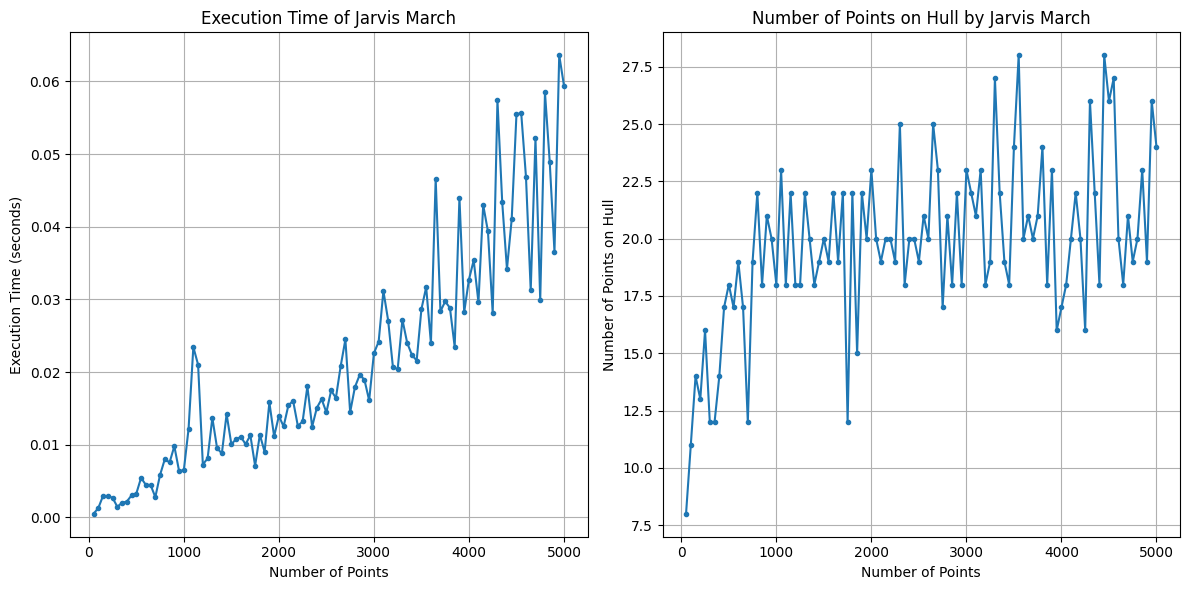

Jarvis execution time for case is  0.007832600000256207


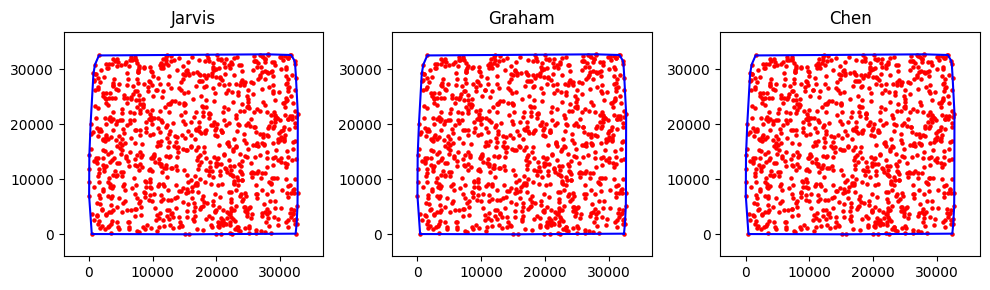

Jarvis execution time for case is  0.006504000004497357


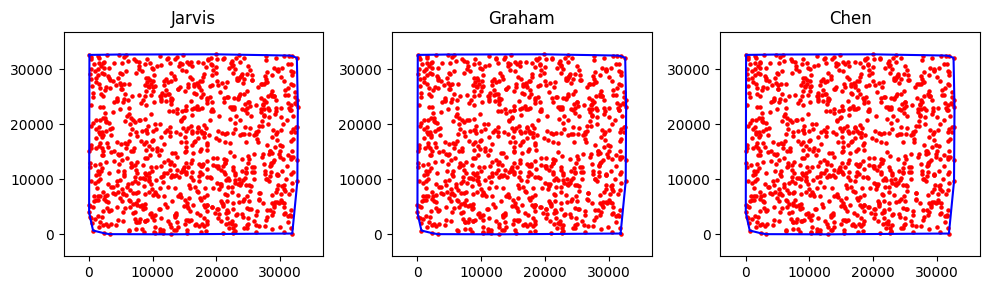

Jarvis execution time for case is  0.010065100002975669


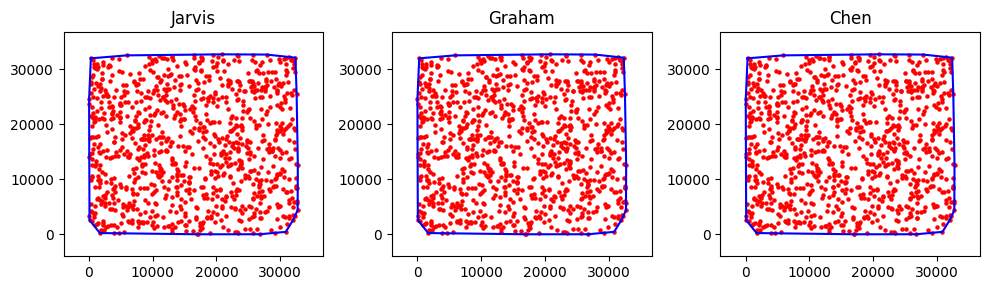

In [104]:
test = TestDataGenerator()
size = 1000
plot_execution_time_and_hull_points(test, 5000, 50)
for i in range(3):
    test.runTest(size)

 Table results for edge cases

Cases  |  Time Complexity | Space Complexity
-------|---------
n=1    |  1
n=2    |  2